<a href="https://colab.research.google.com/github/nescoba/portafolio/blob/main/02091025.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Finantial Data

## Data Wrangling 

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline 
sns.set(rc = {'figure.figsize':(12,12)})


In [2]:
dfs = []
for year in range(2014, 2019):
  dfs.append(pd.read_csv(f'{year}_Financial_Data.csv'))
  dfs[year - 2014]['Year'] = year
  dfs[year - 2014]['Price Var'] = dfs[year - 2014][f'{year+1} PRICE VAR [%]']
  dfs[year - 2014].drop(f'{year+1} PRICE VAR [%]', axis=1, inplace=True)

df = dfs[0]
for year in range(2015, 2019):
  df = pd.merge(df, dfs[year - 2014], how='outer')

df.shape

(22077, 226)

In [3]:
df['Symbol'] = df['Unnamed: 0']
df.drop('Unnamed: 0', axis=1, inplace=True)
df.head()

,Revenue,Revenue Growth,Cost of Revenue,Gross Profit,R&D Expenses,SG&A Expense,Operating Expenses,Operating Income,Interest Expense,Earnings before Tax,Income Tax Expense,Net Income - Non-Controlling int,Net Income - Discontinued ops,Net Income,Preferred Dividends,Net Income Com,EPS,EPS Diluted,Weighted Average Shs Out,Weighted Average Shs Out (Dil),Dividend per Share,Gross Margin,EBITDA Margin,EBIT Margin,Profit Margin,Free Cash Flow margin,EBITDA,EBIT,Consolidated Income,Earnings Before Tax Margin,Net Profit Margin,Cash and cash equivalents,Short-term investments,Cash and short-term investments,Receivables,Inventories,Total current assets,"Property, Plant & Equipment Net",Goodwill and Intangible Assets,Long-term investments,...,ROE,Capex per Share,Gross Profit Growth,EBIT Growth,Operating Income Growth,Net Income Growth,EPS Growth,EPS Diluted Growth,Weighted Average Shares Growth,Weighted Average Shares Diluted Growth,Dividends per Share Growth,Operating Cash Flow growth,Free Cash Flow growth,10Y Revenue Growth (per Share),5Y Revenue Growth (per Share),3Y Revenue Growth (per Share),10Y Operating CF Growth (per Share),5Y Operating CF Growth (per Share),3Y Operating CF Growth (per Share),10Y Net Income Growth (per Share),5Y Net Income Growth (per Share),3Y Net Income Growth (per Share),10Y Shareholders Equity Growth (per Share),5Y Shareholders Equity Growth (per Share),3Y Shareholders Equity Growth (per Share),10Y Dividend per Share Growth (per Share),5Y Dividend per Share Growth (per Share),3Y Dividend per Share Growth (per Share),Receivables growth,Inventory Growth,Asset Growth,Book Value per Share Growth,Debt Growth,R&D Expense Growth,SG&A Expenses Growth,Sector,Class,Year,Price Var,Symbol
0,7.440100e+10,-0.0713,3.903000e+10,3.537100e+10,0.000000e+00,2.146100e+10,2.146100e+10,1.391000e+10,7.090000e+08,1.449400e+10,2.851000e+09,1.420000e+08,-1.127000e+09,1.164300e+10,0.0,1.164300e+10,4.1900,4.010,2.705960e+09,2.705960e+09,2.448,0.4754,0.2470,0.2043,0.1560,0.1359,1.834400e+10,1.520300e+10,1.178500e+10,0.1948,0.1565,8.558000e+09,2.128000e+09,1.068600e+10,6.386000e+09,6.759000e+09,3.161700e+10,2.230400e+10,8.454700e+10,0.000000e+00,...,0.1664,-1.4220,-0.1185,-0.0001,0.0067,0.0293,0.0371,0.0389,-0.0127,NaN,0.0699,-0.0615,-0.0695,0.0323,0.0088,-0.0182,0.0355,0.0015,0.0260,0.0603,-0.0137,0.0060,0.1442,0.0353,0.0201,0.1013,0.0834,0.0751,-0.0187,-0.0217,0.0359,0.0316,0.1228,0.0000,-0.1746,Consumer Defensive,0,2014,-9.323276,PG
1,3.734148e+09,1.1737,2.805625e+09,9.285226e+08,1.083303e+08,3.441414e+08,7.939267e+08,1.345959e+08,1.214869e+07,1.753823e+08,3.955957e+07,-1.431918e+07,0.000000e+00,1.358227e+08,0.0,1.358227e+08,0.2396,0.226,NaN,1.829362e+07,0.000,0.2487,0.0107,0.0502,0.0058,0.0704,2.456858e+08,1.875310e+08,1.215036e+08,0.0470,0.0364,7.735149e+08,6.083852e+08,1.381900e+09,1.169487e+07,5.793193e+08,2.134397e+09,3.085975e+08,1.906587e+08,6.299354e+07,...,0.3294,-17.8582,1.2489,1.6142,1.9463,1.5649,1.4625,1.4646,0.0184,0.0195,0.0000,0.2134,-0.3626,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.6484,1.7313,Consumer Defensive,0,2014,-25.512193,VIPS
2,9.837500e+10,0.0182,7.813800e+10,2.023700e+10,0.000000e+00,1.519600e+10,1.751200e+10,2.725000e+09,4.430000e+08,2.270000e+09,7.510000e+08,1.200000e+07,0.000000e+00,1.519000e+09,0.0,1.519000e+09,1.4700,1.450,1.033053e+09,1.028000e+09,0.307,0.2057,0.0450,0.0276,0.0150,0.0126,4.416000e+09,2.713000e+09,1.531000e+09,0.0231,0.0154,4.010000e+08,0.000000e+00,4.010000e+08,1.116000e+09,5.651000e+09,8.830000e+09,1.689300e+10,2.837000e+09,0.000000e+00,...,0.2821,-2.2665,0.0173,-0.0145,-0.0141,0.0147,0.0576,0.0469,-0.0356,-0.0317,0.2429,0.2095,0.3935,0.1027,0.1038,0.1399,0.0889,0.0937,0.0946,0.2272,0.0906,0.1892,0.0676,0.0558,0.0789,0.0000,0.1215,0.1633,0.0618,0.0981,0.1886,0.3268,0.2738,0.0000,0.0234,Consumer Defensive,1,2014,33.118297,KR
3,2.552641e+10,0.0053,1.820268e+10,7.323734e+09,0.000000e+00,6.561162e+09,6.586482e+09,7.372520e+08,4.245910e+08,2.502180e+08,

In [4]:
from sklearn.impute import SimpleImputer

non_num_attribs = ['Sector', 'Class', 'Symbol']
num_attribs = list(df.columns)
for attrib in non_num_attribs:
    num_attribs.remove(attrib)

df_num = df[num_attribs]

imputer = SimpleImputer()
X = imputer.fit_transform(df_num)

imp_df = pd.DataFrame(X, columns=df_num.columns)
imp_df.head()

,Revenue,Revenue Growth,Cost of Revenue,Gross Profit,R&D Expenses,SG&A Expense,Operating Expenses,Operating Income,Interest Expense,Earnings before Tax,Income Tax Expense,Net Income - Non-Controlling int,Net Income - Discontinued ops,Net Income,Preferred Dividends,Net Income Com,EPS,EPS Diluted,Weighted Average Shs Out,Weighted Average Shs Out (Dil),Dividend per Share,Gross Margin,EBITDA Margin,EBIT Margin,Profit Margin,Free Cash Flow margin,EBITDA,EBIT,Consolidated Income,Earnings Before Tax Margin,Net Profit Margin,Cash and cash equivalents,Short-term investments,Cash and short-term investments,Receivables,Inventories,Total current assets,"Property, Plant & Equipment Net",Goodwill and Intangible Assets,Long-term investments,...,Receivables Turnover,Payables Turnover,Inventory Turnover,ROE,Capex per Share,Gross Profit Growth,EBIT Growth,Operating Income Growth,Net Income Growth,EPS Growth,EPS Diluted Growth,Weighted Average Shares Growth,Weighted Average Shares Diluted Growth,Dividends per Share Growth,Operating Cash Flow growth,Free Cash Flow growth,10Y Revenue Growth (per Share),5Y Revenue Growth (per Share),3Y Revenue Growth (per Share),10Y Operating CF Growth (per Share),5Y Operating CF Growth (per Share),3Y Operating CF Growth (per Share),10Y Net Income Growth (per Share),5Y Net Income Growth (per Share),3Y Net Income Growth (per Share),10Y Shareholders Equity Growth (per Share),5Y Shareholders Equity Growth (per Share),3Y Shareholders Equity Growth (per Share),10Y Dividend per Share Growth (per Share),5Y Dividend per Share Growth (per Share),3Y Dividend per Share Growth (per Share),Receivables growth,Inventory Growth,Asset Growth,Book Value per Share Growth,Debt Growth,R&D Expense Growth,SG&A Expenses Growth,Year,Price Var
0,7.440100e+10,-0.0713,3.903000e+10,3.537100e+10,0.000000e+00,2.146100e+10,2.146100e+10,1.391000e+10,7.090000e+08,1.449400e+10,2.851000e+09,1.420000e+08,-1.127000e+09,1.164300e+10,0.0,1.164300e+10,4.1900,4.010,2.705960e+09,2.705960e+09,2.448,0.4754,0.2470,0.2043,0.1560,0.1359,1.834400e+10,1.520300e+10,1.178500e+10,0.1948,0.1565,8.558000e+09,2.128000e+09,1.068600e+10,6.386000e+09,6.759000e+09,3.161700e+10,2.230400e+10,8.454700e+10,0.000000e+00,...,11.540400,1.564800,10.886900,0.1664,-1.4220,-0.1185,-0.0001,0.0067,0.0293,0.0371,0.0389,-0.0127,189.61097,0.0699,-0.0615,-0.0695,0.032300,0.008800,-0.018200,0.035500,0.00150,0.026000,0.060300,-0.013700,0.006000,0.144200,0.035300,0.020100,0.10130,0.083400,0.075100,-0.018700,-0.021700,0.035900,0.031600,0.122800,0.0000,-0.1746,2014.0,-9.323276
1,3.734148e+09,1.1737,2.805625e+09,9.285226e+08,1.083303e+08,3.441414e+08,7.939267e+08,1.345959e+08,1.214869e+07,1.753823e+08,3.955957e+07,-1.431918e+07,0.000000e+00,1.358227e+08,0.0,1.358227e+08,0.2396,0.226,2.631767e+08,1.829362e+07,0.000,0.2487,0.0107,0.0502,0.0058,0.0704,2.456858e+08,1.875310e+08,1.215036e+08,0.0470,0.0364,7.735149e+08,6.083852e+08,1.381900e+09,1.169487e+07,5.793193e+08,2.134397e+09,3.085975e+08,1.906587e+08,6.299354e+07,...,44.772268,6.213959,31.624186,0.3294,-17.8582,1.2489,1.6142,1.9463,1.5649,1.4625,1.4646,0.0184,0.01950,0.0000,0.2134,-0.3626,0.021051,0.028228,0.040704,0.037766,0.04725,0.064219,0.030847,0.056921,0.072423,0.033468,0.039182,0.047642,-0.02619,-0.000596,0.012298,10.978239,0.158858,1.134221,0.783208,3.733922,1.6484,1.7313,2014.0,-25.512193
2,9.837500e+10,0.0182,7.813800e+10,2.023700e+10,0.000000e+00,1.519600e+10,1.751200e+10,2.725000e+09,4.430000e+08,2.270000e+09,7.510000e+08,1.200000e+07,0.000000e+00,1.519000e+09,0.0,1.519000e+09,1.4700,1.450,1.033053e+09,1.028000e+09,0.307,0.2057,0.0450,0.0276,0.0150,0.0126,4.416000e+09,2.713000e+09,1.531000e+09,0.0231,0.0154,4.010000e+08,0.000000e+00,4.010000e+08,1.116000e+09,5.651000e+09,8.830000e+09,1.689300e+10,2.837000e+09,0.000000e+00,...,90.793700,4.959300,18.222700,0.2821,-2.2665,0.0173,-0.0145,-0.0141,0.0147,0.0576,0.0469,-0.0356,-0.03170,0.2429,0.2095,0.3935,0.102700,0.103800,0.139900,0.088900,0.09370,0.094600,0.227200,0.090600,0.189200,0.06

In [5]:
from sklearn.preprocessing import StandardScaler

no_standard = ['Price Var']

standard_attribs = num_attribs.copy()
for column in no_standard:
    standard_attribs.remove(column)

stand_imp_df = StandardScaler().fit_transform(imp_df[standard_attribs])

stand_imp_df = pd.DataFrame(stand_imp_df, columns=standard_attribs)

stand_imp_df.head()

,Revenue,Revenue Growth,Cost of Revenue,Gross Profit,R&D Expenses,SG&A Expense,Operating Expenses,Operating Income,Interest Expense,Earnings before Tax,Income Tax Expense,Net Income - Non-Controlling int,Net Income - Discontinued ops,Net Income,Preferred Dividends,Net Income Com,EPS,EPS Diluted,Weighted Average Shs Out,Weighted Average Shs Out (Dil),Dividend per Share,Gross Margin,EBITDA Margin,EBIT Margin,Profit Margin,Free Cash Flow margin,EBITDA,EBIT,Consolidated Income,Earnings Before Tax Margin,Net Profit Margin,Cash and cash equivalents,Short-term investments,Cash and short-term investments,Receivables,Inventories,Total current assets,"Property, Plant & Equipment Net",Goodwill and Intangible Assets,Long-term investments,...,Days of Inventory on Hand,Receivables Turnover,Payables Turnover,Inventory Turnover,ROE,Capex per Share,Gross Profit Growth,EBIT Growth,Operating Income Growth,Net Income Growth,EPS Growth,EPS Diluted Growth,Weighted Average Shares Growth,Weighted Average Shares Diluted Growth,Dividends per Share Growth,Operating Cash Flow growth,Free Cash Flow growth,10Y Revenue Growth (per Share),5Y Revenue Growth (per Share),3Y Revenue Growth (per Share),10Y Operating CF Growth (per Share),5Y Operating CF Growth (per Share),3Y Operating CF Growth (per Share),10Y Net Income Growth (per Share),5Y Net Income Growth (per Share),3Y Net Income Growth (per Share),10Y Shareholders Equity Growth (per Share),5Y Shareholders Equity Growth (per Share),3Y Shareholders Equity Growth (per Share),10Y Dividend per Share Growth (per Share),5Y Dividend per Share Growth (per Share),3Y Dividend per Share Growth (per Share),Receivables growth,Inventory Growth,Asset Growth,Book Value per Share Growth,Debt Growth,R&D Expense Growth,SG&A Expenses Growth,Year
0,2.225424,-0.012416,1.443993,3.932535,-0.141655,5.629717,3.693319,4.591282,1.273897,5.818641,0.354750,0.944295,-4.891230,4.416460,-0.092577,4.414880,0.012265,0.012363,1.236439,1.195360,0.018019,-0.013533,0.040397,0.035645,0.041262,0.033151,4.065696,4.536054,4.427324,0.035416,0.035481,0.314642,0.039924,0.244439,0.569522,0.724585,0.595556,1.152882,9.786189,-0.089491,...,0.009602,-0.020758,-0.066262,-3.028714e-02,-0.015160,0.030074,-0.008402,-0.003663,-0.002532,0.009610,-0.006873,-0.007473,-0.008784,-1.249945e-18,-0.026759,-0.012863,0.006110,9.549505e-02,-0.097800,-0.129826,-2.600753e-02,-2.742452e-01,-1.351490e-01,0.351964,-4.103998e-01,-0.198102,1.167669e+00,-0.022745,-0.080175,7.265740e-01,4.252167e-01,2.624649e-01,-0.010506,-0.058562,-2.562788e-02,-1.211147e-02,-2.199518e-02,-0.024183,-0.038061,-1.521459
1,-0.045880,-0.008231,-0.018284,-0.122675,0.006850,-0.143753,-0.105648,-0.156866,-0.178494,-0.131786,-0.011791,-0.203450,0.014104,-0.099224,-0.092577,-0.098568,0.012261,0.012358,0.000000,-0.121620,-0.017767,-0.260068,0.039351,0.034909,0.040607,0.032813,-0.159522,-0.133300,-0.108974,0.034709,0.034908,-0.052943,-0.042064,-0.054926,-0.101529,0.008725,-0.073723,-0.141568,-0.182040,-0.087568,...,0.009257,0.000000,0.000000,-5.188796e-18,-0.015159,0.030047,-0.007800,0.003657,0.008254,0.016140,0.032906,-0.007468,-0.008763,-8.337957e-03,-0.047936,-0.012808,0.005595,2.945184e-17,0.000000,0.000000,7.965482e-17,-4.159432e-17,4.907386e-17,0.000000,4.032382e-17,0.000000,-7.317080e-17,0.000000,0.000000,-1.977267e-17,3.293173e-18,7.249826e-18,0.000000,0.000000,-5.181119e-18,-1.789022e-18,-2.704927e-18,0.110669,0.096335,-1.521459
2,2.995973,-0.012115,3.022673,2.150678,-0.141655,3.916830,2.967424,0.736002,0.719495,0.738680,0.080962,-0.010206,0.014104,0.443567,-0.092577,0.443954,0.012262,0.012360,0.389680,0.373145,-0.013279,-0.306831,0.039503,0.034802,0.040647,0.032515,0.814076,0.652044,0.439224,0.034595,0.034808,-0.070533,-0.074889,-0.086487,0.014726,0.596234,0.078273,0.834440,0.130673,-0.089491,...,0.010645,0.028746,-0.017882,-1.957309e-02,-0.015159,0.030072,-0.008342,-0.003728,-0.002648,0.009548,-0.006301,-0.007473,-0.008799,-8.340208e-03,0.025655,-0.012809,0.006924,6.931147e-01,0.380425,0.218630,5.

In [6]:
from sklearn.preprocessing import OneHotEncoder

categories = OneHotEncoder(sparse=False).fit_transform(df['Sector'].to_numpy().reshape(-1,1))

categories = pd.DataFrame(categories, columns=[f'sector_{i}' for i in range(categories.shape[1])])

categories.head()

,sector_0,sector_1,sector_2,sector_3,sector_4,sector_5,sector_6,sector_7,sector_8,sector_9,sector_10
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [7]:
X = pd.concat([stand_imp_df, categories], axis=1)
X.head()

,Revenue,Revenue Growth,Cost of Revenue,Gross Profit,R&D Expenses,SG&A Expense,Operating Expenses,Operating Income,Interest Expense,Earnings before Tax,Income Tax Expense,Net Income - Non-Controlling int,Net Income - Discontinued ops,Net Income,Preferred Dividends,Net Income Com,EPS,EPS Diluted,Weighted Average Shs Out,Weighted Average Shs Out (Dil),Dividend per Share,Gross Margin,EBITDA Margin,EBIT Margin,Profit Margin,Free Cash Flow margin,EBITDA,EBIT,Consolidated Income,Earnings Before Tax Margin,Net Profit Margin,Cash and cash equivalents,Short-term investments,Cash and short-term investments,Receivables,Inventories,Total current assets,"Property, Plant & Equipment Net",Goodwill and Intangible Assets,Long-term investments,...,EPS Diluted Growth,Weighted Average Shares Growth,Weighted Average Shares Diluted Growth,Dividends per Share Growth,Operating Cash Flow growth,Free Cash Flow growth,10Y Revenue Growth (per Share),5Y Revenue Growth (per Share),3Y Revenue Growth (per Share),10Y Operating CF Growth (per Share),5Y Operating CF Growth (per Share),3Y Operating CF Growth (per Share),10Y Net Income Growth (per Share),5Y Net Income Growth (per Share),3Y Net Income Growth (per Share),10Y Shareholders Equity Growth (per Share),5Y Shareholders Equity Growth (per Share),3Y Shareholders Equity Growth (per Share),10Y Dividend per Share Growth (per Share),5Y Dividend per Share Growth (per Share),3Y Dividend per Share Growth (per Share),Receivables growth,Inventory Growth,Asset Growth,Book Value per Share Growth,Debt Growth,R&D Expense Growth,SG&A Expenses Growth,Year,sector_0,sector_1,sector_2,sector_3,sector_4,sector_5,sector_6,sector_7,sector_8,sector_9,sector_10
0,2.225424,-0.012416,1.443993,3.932535,-0.141655,5.629717,3.693319,4.591282,1.273897,5.818641,0.354750,0.944295,-4.891230,4.416460,-0.092577,4.414880,0.012265,0.012363,1.236439,1.195360,0.018019,-0.013533,0.040397,0.035645,0.041262,0.033151,4.065696,4.536054,4.427324,0.035416,0.035481,0.314642,0.039924,0.244439,0.569522,0.724585,0.595556,1.152882,9.786189,-0.089491,...,-0.007473,-0.008784,-1.249945e-18,-0.026759,-0.012863,0.006110,9.549505e-02,-0.097800,-0.129826,-2.600753e-02,-2.742452e-01,-1.351490e-01,0.351964,-4.103998e-01,-0.198102,1.167669e+00,-0.022745,-0.080175,7.265740e-01,4.252167e-01,2.624649e-01,-0.010506,-0.058562,-2.562788e-02,-1.211147e-02,-2.199518e-02,-0.024183,-0.038061,-1.521459,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,-0.045880,-0.008231,-0.018284,-0.122675,0.006850,-0.143753,-0.105648,-0.156866,-0.178494,-0.131786,-0.011791,-0.203450,0.014104,-0.099224,-0.092577,-0.098568,0.012261,0.012358,0.000000,-0.121620,-0.017767,-0.260068,0.039351,0.034909,0.040607,0.032813,-0.159522,-0.133300,-0.108974,0.034709,0.034908,-0.052943,-0.042064,-0.054926,-0.101529,0.008725,-0.073723,-0.141568,-0.182040,-0.087568,...,-0.007468,-0.008763,-8.337957e-03,-0.047936,-0.012808,0.005595,2.945184e-17,0.000000,0.000000,7.965482e-17,-4.159432e-17,4.907386e-17,0.000000,4.032382e-17,0.000000,-7.317080e-17,0.000000,0.000000,-1.977267e-17,3.293173e-18,7.249826e-18,0.000000,0.000000,-5.181119e-18,-1.789022e-18,-2.704927e-18,0.110669,0.096335,-1.521459,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2.995973,-0.012115,3.022673,2.150678,-0.141655,3.916830,2.967424,0.736002,0.719495,0.738680,0.080962,-0.010206,0.014104,0.443567,-0.092577,0.443954,0.012262,0.012360,0.389680,0.373145,-0.013279,-0.306831,0.039503,0.034802,0.040647,0.032515,0.814076,0.652044,0.439224,0.034595,0.034808,-0.070533,-0.074889,-0.086487,0.014726,0.596234,0.078273,0.834440,0.130673,-0.089491,...,-0.007473,-0.008799,-8.340208e-03,0.025655,-0.012809,0.006924,6.931147e-01,0.380425,0.218630,5.869962e-01,2.784361e-01,1.074305e-01,2.346456,1.957162e-01,0.348279,3.599206e-01,0.097367,0.090991,1.492567e-01,6.180926e-01,6.310739e-01,-0.010429,-0.019706,-2.206482e-02,-7.354598e-03,-2.107544e-02,-0.024183,-0.024099,-1.521459,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.654545,-0.012158,0.603252,0.630288,-0.141655,1.556

In [8]:
y = df['Class']
y.head()

0    0
1    0
2    1
3    1
4    1
Name: Class, dtype: int64

In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=0)

In [12]:
X_train, X_valid, y_train, y_valid = train_test_split(X,y, test_size=0.2, random_state=0)

## Training the model 

In [10]:
import tensorflow as tf
from tensorflow import keras

In [11]:
X_train.shape

(17661, 233)

In [14]:
y_train.shape

(17661,)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


Epoch 1/50


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1096: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


551/552 [============================>.] - ETA: 0s - loss: 0.7296

/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1096: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


552/552 [==============================] - 6s 8ms/step - loss: 0.7296 - val_loss: 0.7371
Epoch 2/50
552/552 [==============================] - 4s 8ms/step - loss: 0.6824 - val_loss: 0.7187
Epoch 3/50
552/552 [==============================] - 4s 8ms/step - loss: 0.6733 - val_loss: 0.7115
Epoch 4/50
552/552 [==============================] - 4s 8ms/step - loss: 0.6665 - val_loss: 0.7060
Epoch 5/50
552/552 [==============================] - 4s 7ms/step - loss: 0.6627 - val_loss: 0.7067
Epoch 6/50
552/552 [==============================] - 4s 8ms/step - loss: 0.6545 - val_loss: 0.7046
Epoch 7/50
552/552 [==============================] - 4s 8ms/step - loss: 0.6509 - val_loss: 0.7056
Epoch 8/50
552/552 [==============================] - 4s 8ms/step - loss: 0.6496 - val_loss: 0.7094
Epoch 9/50
552/552 [==============================] - 4s 8ms/step - loss: 0.6446 - val_loss: 0.7034
Epoch 10/50
552/552 [==============================] - 4s 8ms/step - loss: 0.6440 - val_loss: 0.6998
Epoch 11/5

(0.0, 1.0)

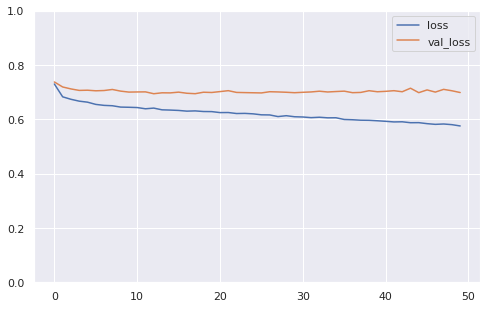

In [44]:
model = keras.models.Sequential([
 keras.layers.InputLayer(input_shape=[233]),
 keras.layers.BatchNormalization(),
 keras.layers.Dense(300, activation="elu", kernel_initializer="he_normal"),
 keras.layers.BatchNormalization(),
 keras.layers.Dense(300, activation="elu", kernel_initializer="he_normal"),
 keras.layers.BatchNormalization(),
  keras.layers.Dense(300, activation="elu", kernel_initializer="he_normal"),
 keras.layers.BatchNormalization(),
  keras.layers.Dense(300, activation="elu", kernel_initializer="he_normal"),
 keras.layers.BatchNormalization(),
 keras.layers.Dense(1, activation="sigmoid")
])

optimizer = keras.optimizers.SGD(lr=3e-3)
model.compile(loss=tf.keras.losses.BinaryCrossentropy(from_logits=True), optimizer=optimizer)

history = model.fit(X_train, y_train, epochs=50, validation_data=(X_valid, y_valid))

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)


In [40]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score

def eval_clf(clf):
  y_val_pred = clf.predict(X_valid) > 0.5
  scores = [accuracy_score(y_valid, y_val_pred), f1_score(y_valid, y_val_pred), 
            recall_score(y_valid, y_val_pred), precision_score(y_valid, y_val_pred)]
  names = ['accuracy', 'f1', 'recall', 'precision']
  return pd.Series(scores, index=names)

In [45]:
eval_clf(model)

accuracy     0.595562
f1           0.668769
recall       0.748754
precision    0.604223
dtype: float64